In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_excel("GLCM_extended_dataset_31-01-2023.xlsx")
data

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,3.678102,6.468785,6.257544,6.491273,0.915573,0.018493,0.075505,0.021779,0.275196,0.202223,...,0.003788,0.002980,0.003008,0.002954,0.061551,0.054587,0.054849,0.054355,2,1.png
1,4.396102,12.171347,13.892070,13.380560,0.959208,0.717372,0.645733,0.672928,0.354369,0.256529,...,0.003142,0.002297,0.002205,0.002255,0.056056,0.047928,0.046956,0.047492,2,10.jpg.png
2,3.334305,4.433875,4.334105,4.405370,0.787040,0.602248,0.619119,0.608713,0.280222,0.224585,...,0.003641,0.002988,0.003047,0.003001,0.060337,0.054659,0.055196,0.054781,2,10.png
3,4.314475,5.777836,5.753193,5.763689,0.756037,0.628341,0.657986,0.623906,0.252098,0.192253,...,0.002579,0.001978,0.001920,0.001995,0.050784,0.044475,0.043812,0.044663,2,100.png
4,5.857288,16.737261,17.875895,17.089386,0.952071,0.403892,0.267009,0.377622,0.201498,0.107262,...,0.001144,0.000805,0.000844,0.000806,0.033822,0.028372,0.029049,0.028390,2,10091.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,23.481220,30.345158,30.512421,30.975999,0.535553,0.257932,0.237396,0.235897,0.079017,0.053209,...,0.000208,0.000178,0.000181,0.000175,0.014408,0.013337,0.013463,0.013237,2,patch_84.jpg.png
3249,10.396915,12.462028,10.927123,13.065667,0.934857,0.922187,0.943582,0.912712,0.240068,0.229951,...,0.006595,0.006695,0.007070,0.006693,0.081207,0.081823,0.084082,0.081810,2,patch_85.jpg.png
3250,10.012814,12.596706,10.747684,12.538851,0.886700,0.827074,0.864881,0.827950,0.208428,0.204580,...,0.004498,0.004434,0.004641,0.004474,0.067069,0.066591,0.068127,0.066891,2,patch_86.jpg.png
3251,9.368169,11.030546,9.425825,10.964421,0.894877,0.866559,0.900581,0.867088,0.220739,0.212628,...,0.004704,0.004694,0.004925,0.004767,0.068582,0.068510,0.070177,0.069047,2,patch_87.jpg.png


In [3]:
df = pd.read_excel("GLCM_extended_dataset_31-01-2023.xlsx")
df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,3.678102,6.468785,6.257544,6.491273,0.915573,0.018493,0.075505,0.021779,0.275196,0.202223,...,0.003788,0.002980,0.003008,0.002954,0.061551,0.054587,0.054849,0.054355,2,1.png
1,4.396102,12.171347,13.892070,13.380560,0.959208,0.717372,0.645733,0.672928,0.354369,0.256529,...,0.003142,0.002297,0.002205,0.002255,0.056056,0.047928,0.046956,0.047492,2,10.jpg.png
2,3.334305,4.433875,4.334105,4.405370,0.787040,0.602248,0.619119,0.608713,0.280222,0.224585,...,0.003641,0.002988,0.003047,0.003001,0.060337,0.054659,0.055196,0.054781,2,10.png
3,4.314475,5.777836,5.753193,5.763689,0.756037,0.628341,0.657986,0.623906,0.252098,0.192253,...,0.002579,0.001978,0.001920,0.001995,0.050784,0.044475,0.043812,0.044663,2,100.png
4,5.857288,16.737261,17.875895,17.089386,0.952071,0.403892,0.267009,0.377622,0.201498,0.107262,...,0.001144,0.000805,0.000844,0.000806,0.033822,0.028372,0.029049,0.028390,2,10091.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,23.481220,30.345158,30.512421,30.975999,0.535553,0.257932,0.237396,0.235897,0.079017,0.053209,...,0.000208,0.000178,0.000181,0.000175,0.014408,0.013337,0.013463,0.013237,2,patch_84.jpg.png
3249,10.396915,12.462028,10.927123,13.065667,0.934857,0.922187,0.943582,0.912712,0.240068,0.229951,...,0.006595,0.006695,0.007070,0.006693,0.081207,0.081823,0.084082,0.081810,2,patch_85.jpg.png
3250,10.012814,12.596706,10.747684,12.538851,0.886700,0.827074,0.864881,0.827950,0.208428,0.204580,...,0.004498,0.004434,0.004641,0.004474,0.067069,0.066591,0.068127,0.066891,2,patch_86.jpg.png
3251,9.368169,11.030546,9.425825,10.964421,0.894877,0.866559,0.900581,0.867088,0.220739,0.212628,...,0.004704,0.004694,0.004925,0.004767,0.068582,0.068510,0.070177,0.069047,2,patch_87.jpg.png


In [4]:
data['dissimilarity_135'] = df['correlation_45']
data

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label,fname
0,3.678102,6.468785,6.257544,0.018493,0.915573,0.018493,0.075505,0.021779,0.275196,0.202223,...,0.003788,0.002980,0.003008,0.002954,0.061551,0.054587,0.054849,0.054355,2,1.png
1,4.396102,12.171347,13.892070,0.717372,0.959208,0.717372,0.645733,0.672928,0.354369,0.256529,...,0.003142,0.002297,0.002205,0.002255,0.056056,0.047928,0.046956,0.047492,2,10.jpg.png
2,3.334305,4.433875,4.334105,0.602248,0.787040,0.602248,0.619119,0.608713,0.280222,0.224585,...,0.003641,0.002988,0.003047,0.003001,0.060337,0.054659,0.055196,0.054781,2,10.png
3,4.314475,5.777836,5.753193,0.628341,0.756037,0.628341,0.657986,0.623906,0.252098,0.192253,...,0.002579,0.001978,0.001920,0.001995,0.050784,0.044475,0.043812,0.044663,2,100.png
4,5.857288,16.737261,17.875895,0.403892,0.952071,0.403892,0.267009,0.377622,0.201498,0.107262,...,0.001144,0.000805,0.000844,0.000806,0.033822,0.028372,0.029049,0.028390,2,10091.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,23.481220,30.345158,30.512421,0.257932,0.535553,0.257932,0.237396,0.235897,0.079017,0.053209,...,0.000208,0.000178,0.000181,0.000175,0.014408,0.013337,0.013463,0.013237,2,patch_84.jpg.png
3249,10.396915,12.462028,10.927123,0.922187,0.934857,0.922187,0.943582,0.912712,0.240068,0.229951,...,0.006595,0.006695,0.007070,0.006693,0.081207,0.081823,0.084082,0.081810,2,patch_85.jpg.png
3250,10.012814,12.596706,10.747684,0.827074,0.886700,0.827074,0.864881,0.827950,0.208428,0.204580,...,0.004498,0.004434,0.004641,0.004474,0.067069,0.066591,0.068127,0.066891,2,patch_86.jpg.png
3251,9.368169,11.030546,9.425825,0.866559,0.894877,0.866559,0.900581,0.867088,0.220739,0.212628,...,0.004704,0.004694,0.004925,0.004767,0.068582,0.068510,0.070177,0.069047,2,patch_87.jpg.png


# **A1**

In [5]:
# Identifying non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Removing non-numeric columns
numeric_data = data.drop(non_numeric_columns, axis=1)

# Preprocessing the numeric data (scaling or normalization might be needed)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# K-means clustering with k = 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(data_scaled)

# K-means clustering with k = 5
kmeans5 = KMeans(n_clusters=5)
kmeans5.fit(data_scaled)

# Checking inertia or silhouette scores for evaluating the clustering
print("K=3 Inertia:", kmeans3.inertia_)
print("K=5 Inertia:", kmeans5.inertia_)

C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K=3 Inertia: 45086.31707606035
K=5 Inertia: 27627.167581336427


# **A2**

C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\KrishnaMohan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

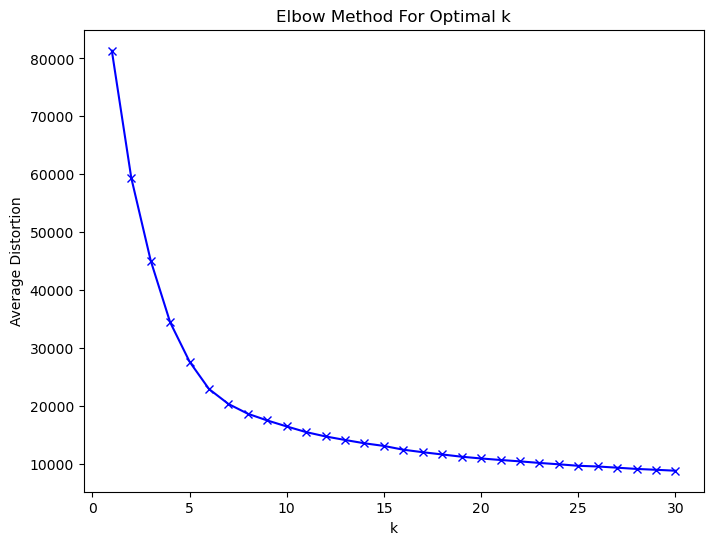

In [6]:
# Determining the ideal k value using the Elbow Method
distortions = []
K = range(1, 31)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# **A3**

In [ ]:
import scipy.cluster.hierarchy as sch

# Hierarchical clustering using Agglomerative Clustering
plt.figure(figsize=(30, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# **A4**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Separating features and target

X = data.drop(columns=['Score'])  # Features
y = data['Score']  # Target

# Selecting only numeric columns for feature selection
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()
X_numeric = X[numeric_columns]

# Scaling numeric data for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(X_scaled, y)

# Getting selected features
selected_features = X_numeric.columns[selector.support_]


In [ ]:
from sklearn.decomposition import PCA

# Performing PCA on scaled data
pca = PCA(n_components=0.95)  # Captures 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Getting the no.of components/features needed for 95% variance
num_features_for_95_variance = pca.n_components_

# Printting the no.of components/features needed for 95% variance
print("Number of features needed for 95% variance in PCA:", num_features_for_95_variance)

# **A5**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# PCA with K components
K = 10  # Update with the desired number of components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_scaled)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model (Logistic Regression as an example)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating accuracy using the transformed dataset
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using transformed dataset:", accuracy)